In [ ]:
pip install pandas



SyntaxError: invalid syntax (61833517.py, line 1)

In [6]:
import pandas as pd

In [9]:
df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.833333,0.019103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.666667,0.126231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666667,0.178560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500000,0.344442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.008637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

dados = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
dados_norm = scaler.fit_transform(dados)

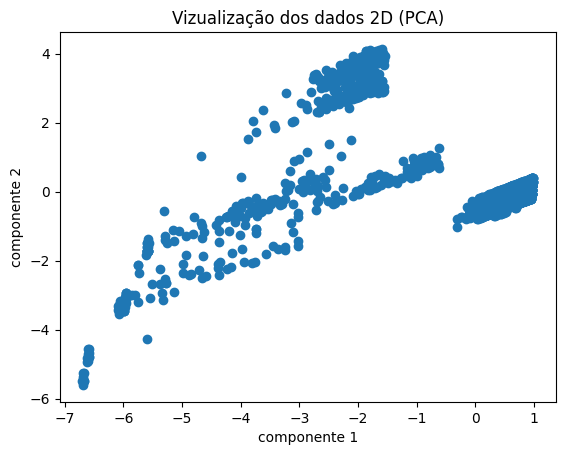

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_norm)

plt.scatter(dados_pca[:,0], dados_pca[:,1])
plt.title("Vizualização dos dados 2D (PCA)")
plt.xlabel("componente 1")
plt.ylabel("componente 2")
plt.show()


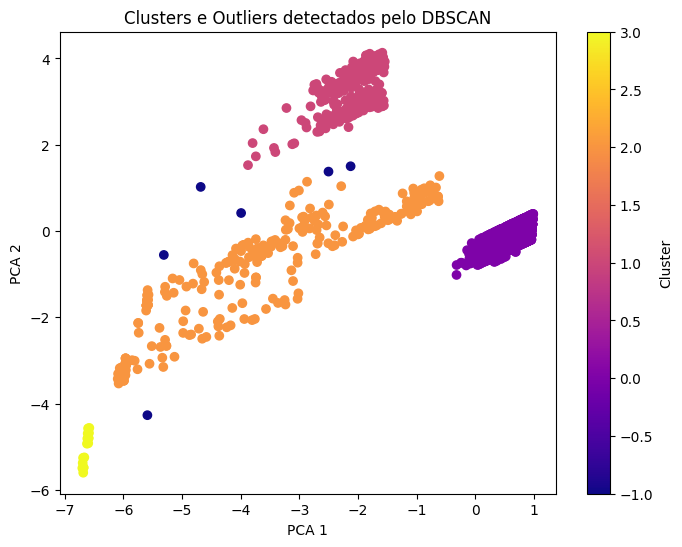

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(dados_pca)

df['cluster'] = clusters

plt.figure(figsize=(8, 6))
plt.scatter(dados_pca[:,0], dados_pca[:,1], c=clusters, cmap = 'plasma')
plt.title("Clusters e Outliers detectados pelo DBSCAN")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

In [16]:
n_clusters  = len(set(clusters)) - (1 if -1 in clusters else 0)
n_outliers = list(clusters).count(-1)

print(f"Número de Clusters encontrados: {n_clusters}")
print(f"Número de Outliers detectados: {n_outliers}")

Número de Clusters encontrados: 4
Número de Outliers detectados: 6


In [17]:
outliers = df[df['cluster'] == -1]
outliers.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster
1416,0.500000,0.185282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2028,0.333333,0.068923,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2487,0.500000,0.671652,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3001,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3014,0.333333,0.668504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1
